In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import langdetect

In [ ]:
data = pd.read_csv("C:/test/youtube_comment_sentiment_analysis/Artifacts/YoutubeCommentsDataSet.csv")

In [3]:
data

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [4]:
data.shape

(18408, 2)

In [5]:
data.sample()['Comment'].values

array(['dear alex in 2 or 3 years from now i will look back at what i have achieved and i am pretty sure your channel will be one of the things i will be more grateful for thank you for all the important information you share here all my admiration from a venezuelan young student living in europe'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [7]:
data.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [8]:
data[data['Comment'].isnull()]

,Comment,Sentiment
602,NaN,negative
716,NaN,neutral
812,NaN,positive
1021,NaN,positive
1023,NaN,neutral
1041,NaN,positive
1094,NaN,positive
2443,NaN,positive
3014,NaN,positive
3235,NaN,positive


In [9]:
data.dropna(inplace=True) #as null values are very less we can drop them

In [10]:
data.describe()

,Comment,Sentiment
count,18364,18364
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11402


In [11]:
data['Comment'].value_counts().head(10)

one of the best thing about dude is that he never takes credit for himself when he achieves something he always request us the audience and his team and he is always polite in all of his videos we congratulations ourselves on this achievement more to come and everything to come                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          10
nice                                                                                                                                                                                                                                 

In [12]:
data[data.duplicated()]

,Comment,Sentiment
173,from all the stuff mentioned i have the dji mi...,positive
518,happy independence day to ukraine and glory t...,negative
847,linus just turn the key lights 180 and bounce ...,positive
848,dan continues to be my new favorite he has suc...,positive
849,dan managing to set up his soldering station o...,positive
...,...,...
18145,explore our free courses with completion certi...,neutral
18283,thanks for this video very neatly calmly expla...,positive
18298,explore our free courses with completion certi...,neutral
18308,do you want to learn technology from me check ...,neutral


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(17874, 2)

In [15]:
data['Sentiment'].value_counts()

positive    11054
neutral      4503
negative     2317
Name: Sentiment, dtype: int64

In [16]:
data[(data['Comment'].str.strip() == '')]

,Comment,Sentiment


In [17]:
data['Comment']=data['Comment'].str.lower()

In [18]:
data[data['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Comment,Sentiment
20,linus just turn the key lights 180 and bounce ...,positive
30,unstoppable experiments with liquid nitrogen,positive
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4...,neutral
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,neutral
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,neutral
...,...,...
18250,wow congratulations for starting such an amazi...,positive
18278,omg such awesome day to day life examples give...,positive
18343,amazing explanation i loved the way you taught,positive
18349,idk if you realise the intensity of positive i...,positive


In [19]:
data['Comment'] = data['Comment'].str.strip()

In [20]:
data[data['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Comment,Sentiment


In [21]:
data[data['Comment'].str.contains('\n')]

,Comment,Sentiment


In [22]:
non_english_pattern = r'[\u0080-\uFFFF][^0-9\s.,!?;:\-a-zA-Z\u2026]+'

In [23]:
data[data['Comment'].str.contains(non_english_pattern, regex=True)]

,Comment,Sentiment
32,liquid nitrogen ഇതുവരെ തീർന്നില്ലേ മച്ചാനെ,neutral
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4t...,neutral
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,neutral
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,neutral
606,empresários entrem com ação no stf já com intu...,neutral
...,...,...
17380,ماشاءالله تبارك الرحمن جدا فيديو ممتاز لابعد ح...,neutral
17381,ما شاء الله حاجه عظيمة والله ربنا يبارك في ح...,neutral
17382,شكرا جدا ي ريت حلقه عن ازاي يكون معانا دخل لين...,neutral
17383,رائع جدا الله يسعدك وينور دربك ويجزاك كل خير,neutral


In [24]:
data = data[~data['Comment'].str.contains(non_english_pattern, regex=True)]

In [25]:
data

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


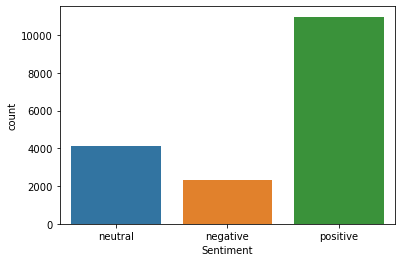

In [27]:
sns.countplot(data=data,x="Sentiment")
plt.show()

In [28]:
# frequency distribution of sentiments

data['Sentiment'].value_counts(normalize=True).mul(100).round(2)

positive    63.08
neutral     23.67
negative    13.26
Name: Sentiment, dtype: float64

In [29]:
data['word_count'] = data['Comment'].apply(lambda x: len(x.split()))

C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\2108703348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['Comment'].apply(lambda x: len(x.split()))


In [30]:
data

,Comment,Sentiment,word_count
0,lets not forget that apple pay in 2014 require...,neutral,57
1,here in nz 50 of retailers don’t even have con...,negative,29
2,i will forever acknowledge this channel with t...,positive,31
3,whenever i go to a place that doesn’t take app...,negative,83
4,apple pay is so convenient secure and easy to ...,positive,26
...,...,...,...
18403,i really like the point about engineering tool...,positive,52
18404,i’ve just started exploring this field and thi...,positive,23
18405,excelente video con una pregunta filosófica pr...,neutral,40
18406,hey daniel just discovered your channel a coup...,positive,16


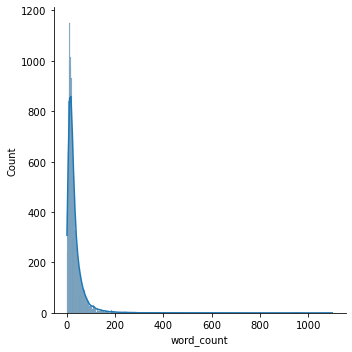

In [31]:
sns.displot(data['word_count'], kde=True)

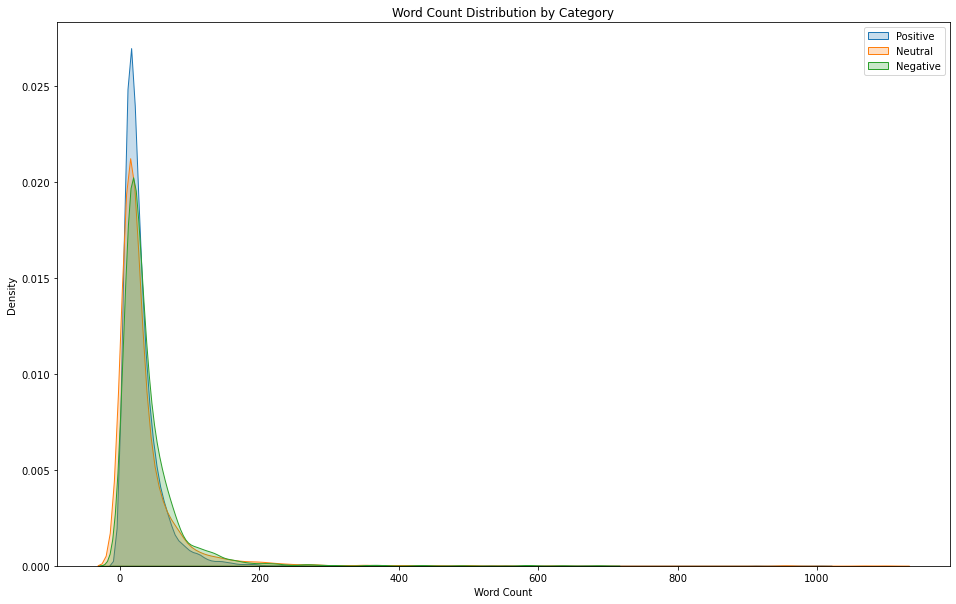

In [32]:
# Create the figure and axes
plt.figure(figsize=(16, 10))

# Plot KDE for category 1
sns.kdeplot(data[data['Sentiment'] == 'positive']['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(data[data['Sentiment'] == 'neutral']['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(data[data['Sentiment'] == 'negative' ]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

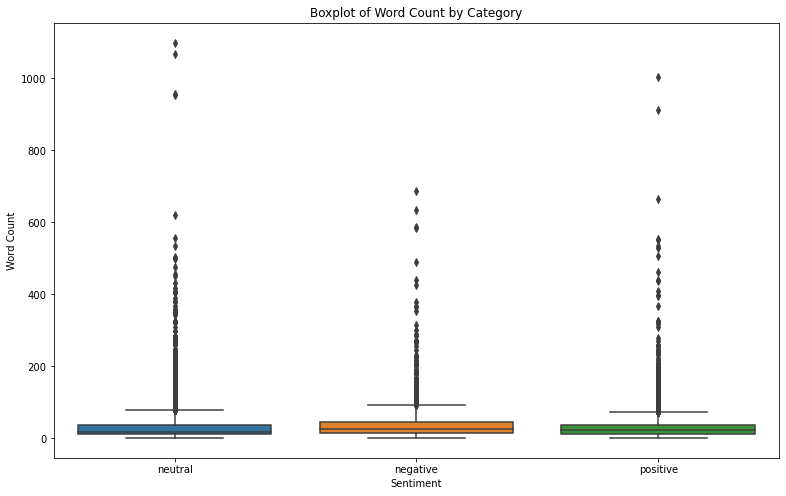

In [33]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(13, 8))
sns.boxplot(data=data, x='Sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

In [34]:
data['Sentiment'] = data['Sentiment'].replace({'positive': int(1), 'negative': int(-1), 'neutral': int(0)})

C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\3505755821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].replace({'positive': int(1), 'negative': int(-1), 'neutral': int(0)})


In [35]:
data

,Comment,Sentiment,word_count
0,lets not forget that apple pay in 2014 require...,0,57
1,here in nz 50 of retailers don’t even have con...,-1,29
2,i will forever acknowledge this channel with t...,1,31
3,whenever i go to a place that doesn’t take app...,-1,83
4,apple pay is so convenient secure and easy to ...,1,26
...,...,...,...
18403,i really like the point about engineering tool...,1,52
18404,i’ve just started exploring this field and thi...,1,23
18405,excelente video con una pregunta filosófica pr...,0,40
18406,hey daniel just discovered your channel a coup...,1,16


<AxesSubplot:xlabel='Sentiment', ylabel='word_count'>

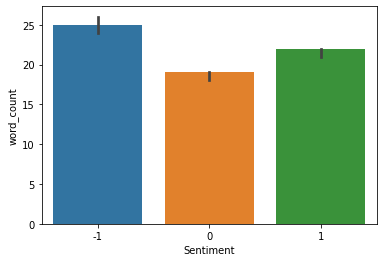

In [ ]:
# median word counts among sentiments
sns.barplot(data=data,x='Sentiment',y='word_count', estimator=np.median)

In [ ]:

# Download NLTK stopwords if not already downloaded

nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
data['num_stop_words'] = data['Comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to C:\Users\Parthiban
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\2005553536.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_stop_words'] = data['Comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


In [38]:
data.head(5)

,Comment,Sentiment,word_count,num_stop_words
0,lets not forget that apple pay in 2014 require...,0,57,23
1,here in nz 50 of retailers don’t even have con...,-1,29,10
2,i will forever acknowledge this channel with t...,1,31,16
3,whenever i go to a place that doesn’t take app...,-1,83,34
4,apple pay is so convenient secure and easy to ...,1,26,12


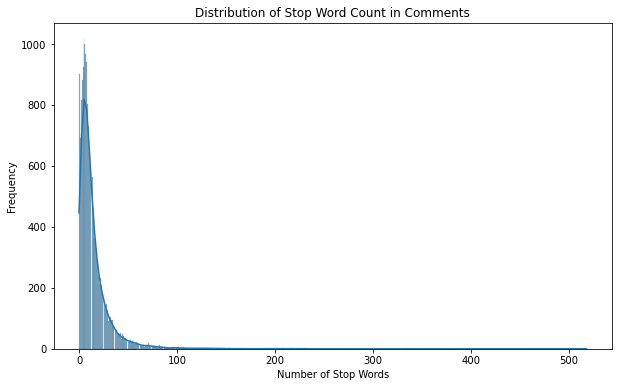

In [39]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(data['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

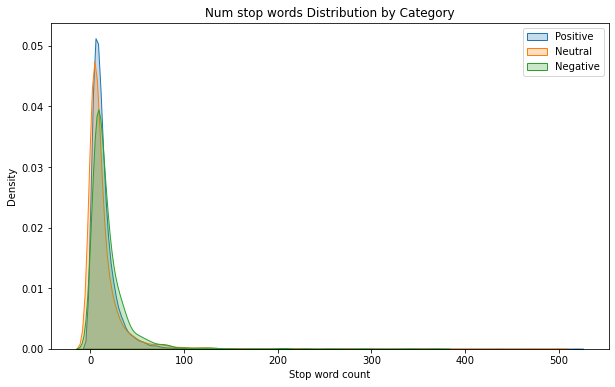

In [40]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(data[data['Sentiment'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(data[data['Sentiment'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(data[data['Sentiment'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

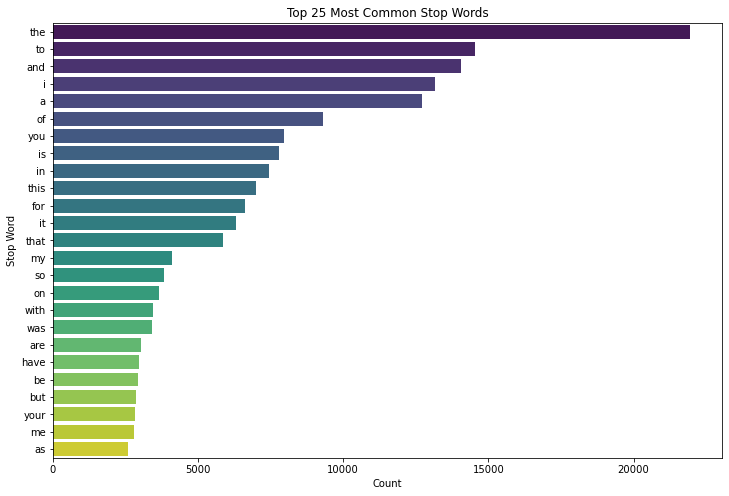

In [41]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in data['Comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [ ]:

# Combine all comments into one large string
all_text = ' '.join(data['Comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [43]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'o', 'i', 'n', 's', 'r', 'h', 'l', 'd', 'u',
       'c', 'm', 'y', 'g', 'p', 'w', 'f', 'b', 'v', 'k', 'j', '0', 'x',
       '1', '2', '’', '3', 'z', '5', 'q', '4', '6', '8', '7', '9', '“',
       '”', 'é', 'á', 'í', '…', 'ó', 'ú', 'ã', 'ü', 'à', 'ê', 'ñ', 'ç',
       '•', 'ä', 'ö', '—', 'ı', '‘', '–', 'è', 'â', 'ł', '\uf0d8', 'ę',
       'ô', '𝗻', '¡', 'ơ', 'ş', '″', 'ạ', '♡', '𝗼', '𝗱', 'ề', 'ế', '►',
       'ậ', 'ż', '\uf0a7', 'ì', 'ś', 'ë', 'đ', '𝗲', '𝗶', 'ệ', 'ữ', 'ấ',
       '𝗹', '₂', '𝗿', '🅸', '🆅', '🅴', '🅻', 'ą', 'ả', 'ğ', '´', 'ć', '̇',
       'ư', 'ố', 'ồ', 'ể', 'ớ', 'ủ', '£', 'å', 'ứ', 'ø', 'ắ', 'ß', '𝘂',
       '―', '·', '𝗮', '■', '𝘆', '𝗴', '𝗧', '€', '\u200b', '𝘀', '„', '𝗽',
       '𝘁', 'î', 'ộ', 'ï', '𝘃', 'ẻ', '×', 'γ', '𝐔', '°', 'ù', '𝙖', 'ừ',
       '𝙢', '𝙧', '→', 'ű', '𝙤', 'ă', 'ω', 'õ', '»', '¿', 'ő', '𝒔', 'θ',
       'ọ', 'ặ', 'ờ', 'ỉ', '𝐎', 'ẽ', 'ũ', '𝙝', 'λ', '𝟐', 'ξ', '𝐄', '𝐘',
       'π', '𝐓', '𝙙', '𝙪', 'φ', '𝙞', 'σ', '𝙣', '𝐁', '🄴', '➜', '𝟎

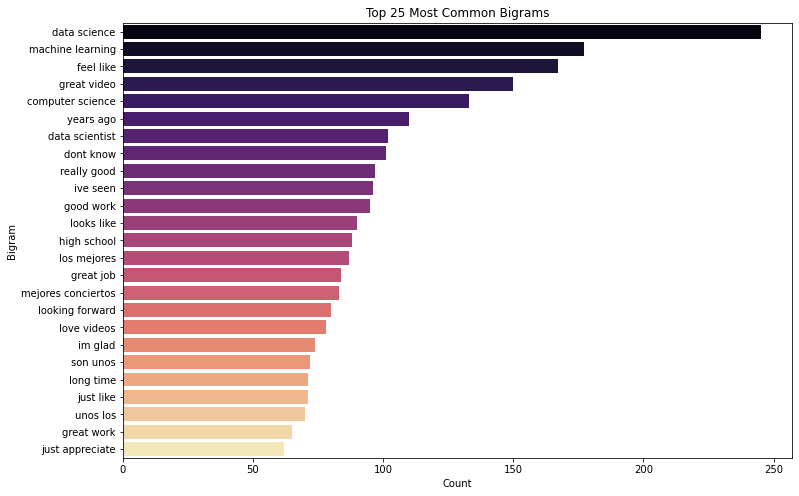

In [ ]:


# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(data['Comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


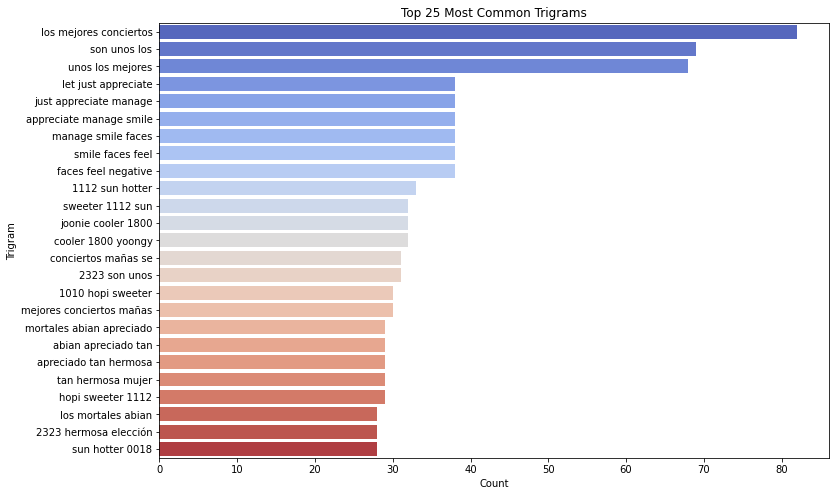

In [45]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(data['Comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Define a function to detect the language of a comment
def detect_language(text):
    try:
        language = langdetect.detect(text)
        return language
    except langdetect.lang_detect_exception.LangDetectException:
        return 'unknown'

# Apply the function to each comment
data['language'] = data['Comment'].apply(detect_language)



C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\3075367743.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['language'] = data['Comment'].apply(detect_language)


In [47]:
# Count the number of comments in each language
data['language'].value_counts()

en         15833
es           359
pt           314
fr           128
it            66
id            66
af            64
tl            60
de            59
pl            53
vi            50
so            35
tr            33
nl            28
ca            28
cy            24
et            24
no            22
da            22
hu            21
ro            16
sw            16
fi            15
sl            14
sq            12
sv             9
hr             9
sk             8
cs             8
unknown        5
lv             2
lt             1
Name: language, dtype: int64

In [48]:
data = data[data['language'] == 'en']

In [49]:
data

,Comment,Sentiment,word_count,num_stop_words,language
0,lets not forget that apple pay in 2014 require...,0,57,23,en
1,here in nz 50 of retailers don’t even have con...,-1,29,10,en
2,i will forever acknowledge this channel with t...,1,31,16,en
3,whenever i go to a place that doesn’t take app...,-1,83,34,en
4,apple pay is so convenient secure and easy to ...,1,26,12,en
...,...,...,...,...,...
18402,back when i was learning to code i didn’t know...,0,126,69,en
18403,i really like the point about engineering tool...,1,52,21,en
18404,i’ve just started exploring this field and thi...,1,23,11,en
18406,hey daniel just discovered your channel a coup...,1,16,5,en


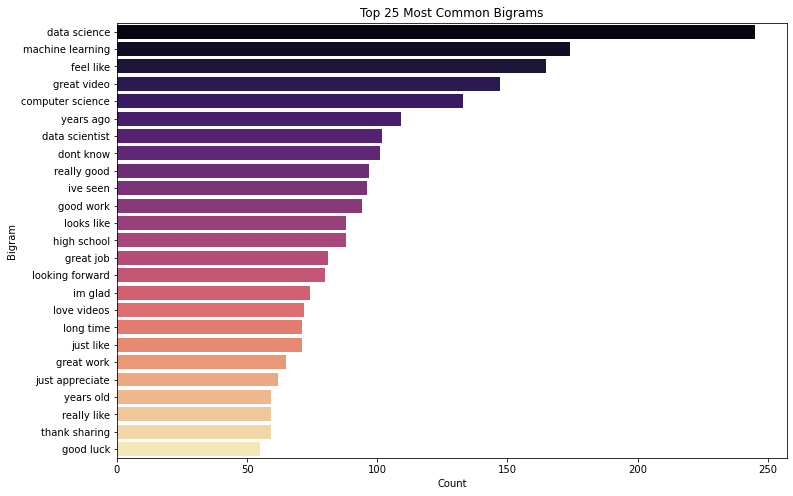

In [ ]:


# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(data['Comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


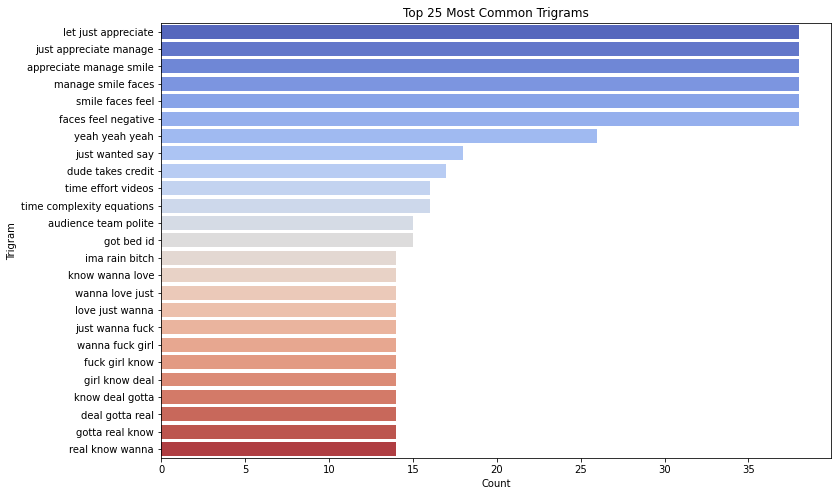

In [51]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(data['Comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'Comment' column, retaining essential ones
data['Comment'] = data['Comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

data


C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\3531975270.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comment'] = data['Comment'].apply(


,Comment,Sentiment,word_count,num_stop_words,language
0,lets not forget apple pay 2014 required brand ...,0,57,23,en
1,nz 50 retailers don’t even contactless credit ...,-1,29,10,en
2,forever acknowledge channel help lessons ideas...,1,31,16,en
3,whenever go place doesn’t take apple pay doesn...,-1,83,34,en
4,apple pay convenient secure easy use used kore...,1,26,12,en
...,...,...,...,...,...
18402,back learning code didn’t know anything asked ...,0,126,69,en
18403,really like point engineering toolboxes think ...,1,52,21,en
18404,i’ve started exploring field really good remin...,1,23,11,en
18406,hey daniel discovered channel couple days ago ...,1,16,5,en


In [ ]:
nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
data['Comment'] = data['Comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

data.head()

[nltk_data] Downloading package wordnet to C:\Users\Parthiban
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\599683031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comment'] = data['Comment'].apply(


,Comment,Sentiment,word_count,num_stop_words,language
0,let not forget apple pay 2014 required brand n...,0,57,23,en
1,nz 50 retailer don’t even contactless credit c...,-1,29,10,en
2,forever acknowledge channel help lesson idea e...,1,31,16,en
3,whenever go place doesn’t take apple pay doesn...,-1,83,34,en
4,apple pay convenient secure easy use used kore...,1,26,12,en


In [55]:
data.drop(['word_count','num_stop_words','language'], axis=1, inplace=True)

C:\Users\Parthiban M\AppData\Local\Temp\ipykernel_12832\3909253648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['word_count','num_stop_words','language'], axis=1, inplace=True)


In [56]:
data.head()

,Comment,Sentiment
0,let not forget apple pay 2014 required brand n...,0
1,nz 50 retailer don’t even contactless credit c...,-1
2,forever acknowledge channel help lesson idea e...,1
3,whenever go place doesn’t take apple pay doesn...,-1
4,apple pay convenient secure easy use used kore...,1


In [ ]:
data.to_csv('C:/test/youtube_comment_sentiment_analysis/Artifacts/youtubecomment_preprocessing.csv', index=False)